In [115]:
import pandas as pd
import tensorflow as tf
from keras import layers
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer

In [116]:
df = pd.read_csv('TeslaInc. ( TSLA ).csv').dropna()
df.Date=pd.to_datetime(df.Date, infer_datetime_format=True)
df=df.set_index('Date')
#df= df.iloc[int(df.shape[0]/2.75):,:]
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500
...,...,...,...,...,...,...
2022-09-13,292.899994,297.399994,290.399994,292.130005,292.130005,68229600
2022-09-14,292.239990,306.000000,291.640015,302.609985,302.609985,72628700
2022-09-15,301.829987,309.119995,300.720001,303.750000,303.750000,64795500


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

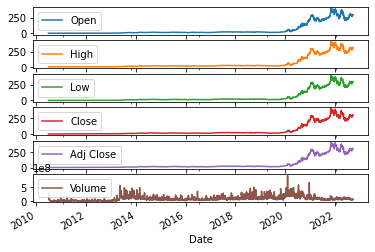

In [117]:
df.plot(subplots=True)

<AxesSubplot:xlabel='Date'>

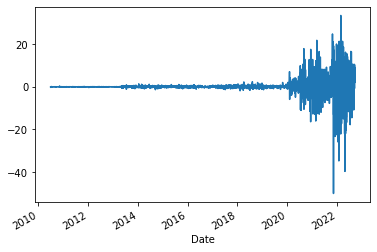

In [118]:
(df.Close-df.Open).plot()

In [119]:
#here Edi will find out what features to consider for maximum efficiency.
list_of_features=['Open','Close','Adj Close', 'Volume']
preprocessor = make_column_transformer((StandardScaler(), list_of_features))

In [120]:
def scaling(dataf,type):
    if type=='linear':
        return dataf.min(),dataf.max(),(dataf-dataf.min())/(dataf.max()-dataf.min())
    elif type=='log': return np.log10(dataf)
    elif type=='zscore': return dataf.mean(),dataf.std(),(dataf- dataf.mean())/dataf.std()
    else: raise ValueError
def inverse_scaling(dataf,type,df_min=None,df_max=None,df_mean=None,df_std=None):
    if type=='linear':
        return (df_max-df_min)*dataf+df_min
    elif type=='log': return np.power(10,dataf)
    elif type=='zscore': return df_std*dataf+df_mean
    else: raise ValueError    

In [121]:
frac=0.91
dff=df.copy()
df_train= dff.iloc[:int(frac*df.shape[0]),:]
df_val = dff.drop(df_train.index,axis=0)
X_train = df_train[list_of_features]
X_val = df_val[list_of_features]
y_train = df_train.drop(X_train,axis=1)
y_val = df_val.drop(X_val,axis=1)
X_train= preprocessor.fit_transform(X_train)
#y_train_mean,y_train_std,
y_train=scaling(y_train,'log')
X_val= preprocessor.fit_transform(X_val)
#y_val_mean,y_val_std,
y_val = scaling(y_val,'log')

In [122]:
print(X_train)
print(y_train)

[[-0.52670402 -0.52909272 -0.52909272  1.8986906 ]
 [-0.52762236 -0.53126616 -0.53126616  0.33046358]
 [-0.52994731 -0.534474   -0.534474   -0.20794068]
 ...
 [ 3.59328243  3.56918397  3.56918397 -0.63693995]
 [ 3.5858426   3.55657351  3.55657351 -0.76395019]
 [ 3.54881783  3.64043071  3.64043071 -0.49611199]]
                High       Low
Date                          
2010-06-30  0.307068  0.191265
2010-07-01  0.237544  0.130762
2010-07-02  0.187521  0.095982
2010-07-06  0.124939  0.023390
2010-07-07  0.044801 -0.000579
...              ...       ...
2021-08-06  2.377992  2.366504
2021-08-09  2.379626  2.371148
2021-08-10  2.378149  2.369142
2021-08-11  2.377294  2.370581
2021-08-12  2.381897  2.367604

[2800 rows x 2 columns]


In [123]:
print(X_val)
print(y_val)

[[-1.10179681 -1.15441923 -1.15441923 -1.06574693]
 [-1.2319764  -1.37300074 -1.37300074 -0.38040683]
 [-1.45832402 -1.51726423 -1.51726423 -0.26008416]
 ...
 [ 0.16773347  0.21404066  0.21404066 -0.50476368]
 [ 0.12122076  0.20557957  0.20557957  0.34641246]
 [ 0.13127779  0.32657492  0.32657492 -0.68669807]]
                High       Low
Date                          
2021-08-13  2.386142  2.376784
2021-08-16  2.373831  2.353082
2021-08-17  2.351912  2.335016
2021-08-18  2.365344  2.348532
2021-08-19  2.359551  2.347389
...              ...       ...
2022-09-13  2.473341  2.462997
2022-09-14  2.485721  2.464847
2022-09-15  2.490127  2.478162
2022-09-16  2.482459  2.470704
2022-09-19  2.491137  2.473925

[277 rows x 2 columns]


In [124]:
#print(y_val_max)
#print(y_val_min)
#print(y_train_max)
#print(y_train_min)

# ANN model test

In [125]:
#based on open and close, let's predict what are the min and max for a given day :)

def create_model(input_shape,activation,numar_neuroni):
    yy =[]
    for i in range(len(numar_neuroni)):
        if i==0:
            yy.extend([layers.Dense(numar_neuroni[i],activation=activation,input_shape=[input_shape]),
                       layers.BatchNormalization()
                      ])
        else:
             yy.extend([layers.Dense(numar_neuroni[i],activation=activation),
                       layers.BatchNormalization()
                      ])                          
    model=tf.keras.models.Sequential(yy)
    return model

model = create_model(input_shape=len(X_train[0]),activation='selu',numar_neuroni=[109,69,27,12,y_val.shape[1]])

In [126]:
model.compile(optimizer='adam',loss=tf.keras.losses.MAE)
history = model.fit(X_train,y_train, validation_data=(X_val,y_val),batch_size=28,epochs=355,callbacks=[tf.keras.callbacks.EarlyStopping(patience=80, min_delta=0.01, restore_best_weights=True)])

Epoch 1/355
100/100 [==============================] - 2s 6ms/step - loss: 1.0714 - val_loss: 2.0202
Epoch 2/355
100/100 [==============================] - 0s 3ms/step - loss: 0.9430 - val_loss: 2.0238
Epoch 3/355
100/100 [==============================] - 0s 3ms/step - loss: 0.8402 - val_loss: 1.9988
Epoch 4/355
100/100 [==============================] - 0s 3ms/step - loss: 0.7393 - val_loss: 2.0231
Epoch 5/355
100/100 [==============================] - 0s 3ms/step - loss: 0.6404 - val_loss: 1.8554
Epoch 6/355
100/100 [==============================] - 0s 3ms/step - loss: 0.5394 - val_loss: 1.8919
Epoch 7/355
100/100 [==============================] - 0s 4ms/step - loss: 0.4458 - val_loss: 1.6888
Epoch 8/355
100/100 [==============================] - 1s 5ms/step - loss: 0.3502 - val_loss: 1.6014
Epoch 9/355
100/100 [==============================] - 1s 5ms/step - loss: 0.2666 - val_loss: 1.5462
Epoch 10/355
100/100 [==============================] - 0s 4ms/step - loss: 0.1868 - val_lo

100/100 [==============================] - 0s 4ms/step - loss: 0.0919 - val_loss: 1.6173
Epoch 82/355
100/100 [==============================] - 0s 4ms/step - loss: 0.1055 - val_loss: 1.6320
Epoch 83/355
100/100 [==============================] - 0s 4ms/step - loss: 0.1088 - val_loss: 1.5834
Epoch 84/355
100/100 [==============================] - 0s 4ms/step - loss: 0.1037 - val_loss: 1.5973
Epoch 85/355
100/100 [==============================] - 0s 4ms/step - loss: 0.0995 - val_loss: 1.6109
Epoch 86/355
100/100 [==============================] - 0s 4ms/step - loss: 0.0976 - val_loss: 1.6232
Epoch 87/355
100/100 [==============================] - 0s 4ms/step - loss: 0.1012 - val_loss: 1.6085
Epoch 88/355
100/100 [==============================] - 0s 4ms/step - loss: 0.1060 - val_loss: 1.5865
Epoch 89/355
100/100 [==============================] - 0s 4ms/step - loss: 0.0912 - val_loss: 1.6188
Epoch 90/355
100/100 [==============================] - 0s 4ms/step - loss: 0.0886 - val_loss: 

<AxesSubplot:>

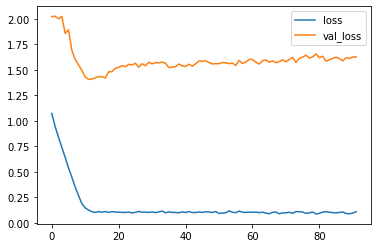

In [127]:
df_hist= pd.DataFrame(history.history)
df_hist.plot()

In [128]:
#let's analyse more in depth how good the model is and where it fails
#def inverse_scaling(dataf,type,df_min=None,df_max=None,df_mean=None,df_std=None):
test=df.copy()
data= model.predict(preprocessor.fit_transform(test[list_of_features]))
print(data.shape)
data = pd.DataFrame(data,columns=['High','Low']).set_index(df.index)
data.High = pd.concat([inverse_scaling(data.High.loc[:y_train.index[-1]],type='log',
                                       #df_mean=y_train_mean.High,df_std=y_train_std.High
                                      ),
                      inverse_scaling(data.High.loc[y_val.index[0]:],type='log',
                                      #df_mean=y_val_mean.High,df_std=y_val_std.High
                                     )
                      ],axis=0, join="outer", ignore_index=False)

data.Low= pd.concat([inverse_scaling(data.Low.loc[:y_train.index[-1]],type='log',
                                     #df_mean=y_train_mean.Low,df_std=y_train_std.Low
                                    ),
                    inverse_scaling(data.Low.loc[y_val.index[0]:],type='log',
                                    #df_mean=y_val_mean.Low,df_std=y_val_std.Low
                                   )], axis=0, join="outer", ignore_index=False)
data

97/97 [==============================] - 0s 3ms/step
(3077, 2)


,High,Low
Date,,
2010-06-30,3.709839,5.325946
2010-07-01,1.922999,3.068630
2010-07-02,1.599491,2.868788
2010-07-06,1.693440,2.938402
2010-07-07,1.689262,2.917265
...,...,...
2022-09-13,234.231918,162.019058
2022-09-14,234.403778,166.368378
2022-09-15,245.198212,170.299576


In [129]:
df.High

Date
2010-06-30      2.028000
2010-07-01      1.728000
2010-07-02      1.540000
2010-07-06      1.333333
2010-07-07      1.108667
                 ...    
2022-09-13    297.399994
2022-09-14    306.000000
2022-09-15    309.119995
2022-09-16    303.709991
2022-09-19    309.839996
Name: High, Length: 3077, dtype: float64

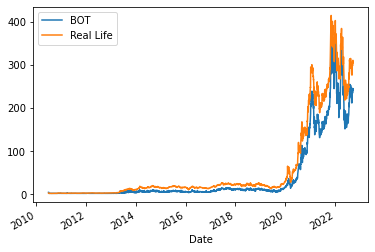

In [130]:
data.High.plot(label='BOT')
df.High.plot(label='Real Life')
plt.legend()

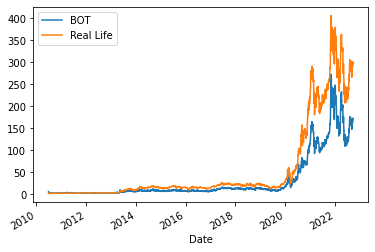

In [131]:
data.Low.plot(label='BOT')
df.Low.plot(label='Real Life')
plt.legend()

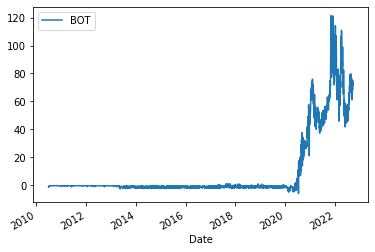

In [133]:
(data.High-data.Low).plot(label='BOT')
plt.legend()

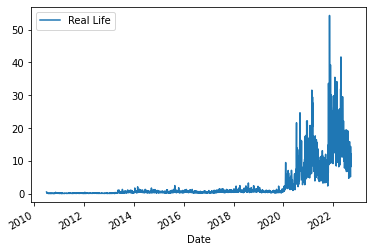

In [134]:
(df.High-df.Low).plot(label='Real Life')
plt.legend()

# RNN Model